## OPTIMIZATION TECHNIQUES AND FEATURE ENGINEERING

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_letters

from sklearn import tree ,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,KFold,StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
#LOADING DATSET
crime_df=pd.read_csv('criminal_san_francisco.csv')
crime_df

,Unnamed: 0,Unnamed: 0.1,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,0,0,2010-10-18 13:37:00,ASSAULT,BATTERY,Monday,SOUTHERN,NONE,-122.407376,37.779989
1,1,1,2013-01-11 03:21:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,TENDERLOIN,NONE,-122.412437,37.783486
2,2,2,2004-03-31 15:00:00,ASSAULT,BATTERY,Wednesday,INGLESIDE,JUVENILE ADMONISHED,-122.451164,37.745564
3,3,3,2005-02-27 22:33:00,ASSAULT,THREATS AGAINST LIFE,Sunday,INGLESIDE,NONE,-122.428614,37.722765
4,4,4,2013-06-30 17:39:00,ASSAULT,BATTERY,Sunday,MISSION,NONE,-122.418449,37.753027
...,...,...,...,...,...,...,...,...,...,...
89995,89995,89995,2005-05-21 17:55:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,TARAVAL,"ARREST, BOOKED",-122.451157,37.716582
89996,89996,89996,2006-06-13 14:14:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,CENTRAL,"ARREST, BOOKED",-122.407562,37.798678
89997,89997,89997,2004-12-08 20:20:00,WARRANTS,WARRANT ARREST,Wednesday,INGLESIDE,"ARREST, BOOKED",-122.417108,37.712256
89998,89998,89998,2009-11-11 07:40:00,WARRANTS,WARRANT ARREST,Wednesday,MISSION,"ARREST, BOOKED",-122.420010,37.770110


In [3]:
df=crime_df[['Category','Descript','DayOfWeek','PdDistrict','Resolution','X','Y']]
df

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,ASSAULT,BATTERY,Monday,SOUTHERN,NONE,-122.407376,37.779989
1,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,TENDERLOIN,NONE,-122.412437,37.783486
2,ASSAULT,BATTERY,Wednesday,INGLESIDE,JUVENILE ADMONISHED,-122.451164,37.745564
3,ASSAULT,THREATS AGAINST LIFE,Sunday,INGLESIDE,NONE,-122.428614,37.722765
4,ASSAULT,BATTERY,Sunday,MISSION,NONE,-122.418449,37.753027
...,...,...,...,...,...,...,...
89995,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,TARAVAL,"ARREST, BOOKED",-122.451157,37.716582
89996,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,CENTRAL,"ARREST, BOOKED",-122.407562,37.798678
89997,WARRANTS,WARRANT ARREST,Wednesday,INGLESIDE,"ARREST, BOOKED",-122.417108,37.712256
89998,WARRANTS,WARRANT ARREST,Wednesday,MISSION,"ARREST, BOOKED",-122.420010,37.770110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    90000 non-null  object 
 1   Descript    90000 non-null  object 
 2   DayOfWeek   90000 non-null  object 
 3   PdDistrict  90000 non-null  object 
 4   Resolution  90000 non-null  object 
 5   X           90000 non-null  float64
 6   Y           90000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.8+ MB


#### Encoding categorical variable to numerical variable

In [5]:

surviver_encoder = preprocessing.LabelEncoder()

# Encoding of the Category
surviver_encoder.fit(df.Category)
print(surviver_encoder.classes_)
df.Category = surviver_encoder.transform(df.Category)

# Encoding of the Descript
surviver_encoder.fit(df.Descript)
print(surviver_encoder.classes_)
df.Descript = surviver_encoder.transform(df.Descript)

# Encoding of the DayOfWeek
surviver_encoder.fit(df.DayOfWeek)
print(surviver_encoder.classes_)
df.DayOfWeek = surviver_encoder.transform(df.DayOfWeek)

# Encoding of the PdDistrict
surviver_encoder.fit(df.PdDistrict)
print(surviver_encoder.classes_)
df.PdDistrict = surviver_encoder.transform(df.PdDistrict)

# Encoding of the Resolution
surviver_encoder.fit(df.Resolution)
print(surviver_encoder.classes_)
df.Resolution = surviver_encoder.transform(df.Resolution)

['ASSAULT' 'DRUG/NARCOTIC' 'LARCENY/THEFT' 'MISSING PERSON' 'ROBBERY'
 'SUSPICIOUS OCC' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS']
['AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF'
 'AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING'
 'AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE'
 'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE'
 'AGGRAVATED ASSAULT WITH A DEADLY WEAPON' 'AGGRAVATED ASSAULT WITH A GUN'
 'AGGRAVATED ASSAULT WITH A KNIFE' 'AGGRAVATED ASSAULT WITH BODILY FORCE'
 'ASSAULT' 'ASSAULT BY POISONING'
 'ASSAULT ON A POLICE OFFICER WITH A DEADLY WEAPON'
 'ASSAULT WITH CAUSTIC CHEMICALS'
 'ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ GUN'
 'ASSAULT, AGGRAVATED, W/ GUN' 'ASSAULT, AGGRAVATED, W/ MACHINE GUN'
 'ATTEMPTED AUTO STRIP' 'ATTEMPTED GRAND THEFT FROM PERSON'
 'ATTEMPTED GRAND THEFT PICKPOCKET' 'ATTEMPTED GRAND THEFT PURSESNATCH'
 'ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON'
 'ATTEMPTED HOMICIDE WITH A GUN' 'ATTEMPTED HOMICIDE WITH A KNIFE'
 'ATTEMPTED HOMICIDE WITH BODI

['ARREST, BOOKED' 'ARREST, CITED' 'CLEARED-CONTACT JUVENILE FOR MORE INFO'
 'COMPLAINANT REFUSES TO PROSECUTE'
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE' 'EXCEPTIONAL CLEARANCE'
 'JUVENILE ADMONISHED' 'JUVENILE BOOKED' 'JUVENILE CITED'
 'JUVENILE DIVERTED' 'LOCATED' 'NONE' 'NOT PROSECUTED'
 'PROSECUTED BY OUTSIDE AGENCY' 'PROSECUTED FOR LESSER OFFENSE'
 'PSYCHOPATHIC CASE' 'UNFOUNDED']


#### DETECTING CORRELATION

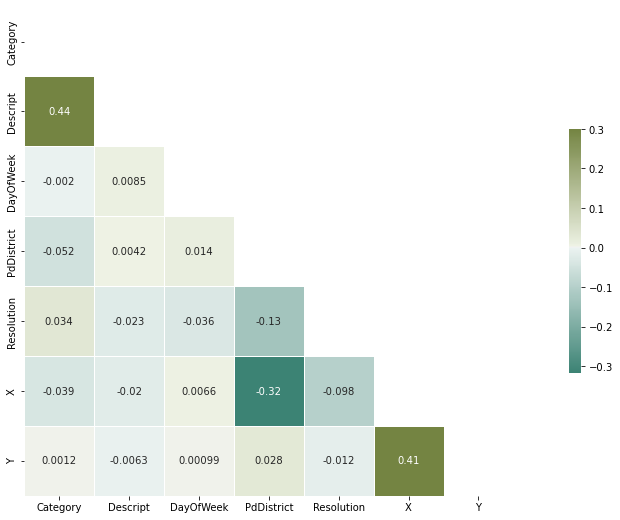

In [6]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(530, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    90000 non-null  int32  
 1   Descript    90000 non-null  int32  
 2   DayOfWeek   90000 non-null  int32  
 3   PdDistrict  90000 non-null  int32  
 4   Resolution  90000 non-null  int32  
 5   X           90000 non-null  float64
 6   Y           90000 non-null  float64
dtypes: float64(2), int32(5)
memory usage: 3.1 MB


### Train Model with Standard Hyperparameters

In [8]:
y = df['Resolution']
X = df[['Category','Descript','DayOfWeek','PdDistrict','X','Y']]
print(y.value_counts())
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 
print(y_test.value_counts())
#clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
print(round(clf.score(X_test, y_test)*100,2),'%')



11    54100
0     24090
10     5790
1      2256
16     1078
7       798
3       427
4       371
8       280
12      177
15      170
6       160
5       135
13       95
9        37
2        32
14        4
Name: Resolution, dtype: int64
11    10764
0      4867
10     1146
1       425
16      218
7       186
3        86
4        77
8        54
12       37
15       36
5        35
6        34
13       17
2         9
9         8
14        1
Name: Resolution, dtype: int64
71.49 %


### GRID SEARCH

In [9]:
grid={"C":np.logspace(-3,3,5), "penalty":["l1","l2"], "max_iter":[10,50,100,200,500]}
grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,7,8,9,10,12]}

clf = tree.DecisionTreeClassifier()

clf_cv=GridSearchCV(clf,grid, cv=5)
clf_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters)--> ",clf_cv.best_params_)

tuned hpyerparameters :(best parameters)-->  {'criterion': 'entropy', 'max_depth': 7}


In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7).fit(X_train, y_train)
print(round(clf.score(X_test, y_test)*100,2),'%')

80.59 %


### CROSS VALIDATION

In [11]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,5), "penalty":["l1","l2"], "max_iter":[10,50,100,200,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,7,8,9,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid, cv=5)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.6290555555555556
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
0.12483333333333334
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4}
0.32155555555555554
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2}
0.8803888888888889
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2}
0.43483333333333335


In [12]:
np.array(scores).mean()

0.47813333333333335

### STRATIFIED CROSS VALIDATION

In [14]:
skf = StratifiedKFold(n_splits=5)
scores1 = []
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,5), "penalty":["l1","l2"], "max_iter":[10,50,100,200,500]}
    
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,7,8,9,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores1.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4}
0.396
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.7188333333333333
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2}
0.6846111111111111
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.9069444444444444
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
0.3318888888888889


In [15]:
np.array(scores1).mean()

0.6076555555555555